## Adam convergence problem

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np

We will solve the online optimization problem for function  $f_t(x) = \begin{cases} 1010x, \text{for t mod 101} = 1 \\ 
-10x, otherwise \end{cases}$

Online optimization task: $ F(x) = \sum_t f_t(x)  \to min_x$

with the constraint set $\mathcal{F} =[-1, 1]$

The analitical solution for this task is $x^*=-1$

In order to understand the problems of Adam, we denote the concept of "regret": $R_T = \sum\limits_{t=1}^T f_t(x_t) - \min\limits_{x \in \mathcal{F}} \sum\limits_{t=1}^T f_t(x)$

The regret should tend to zero during optimization, it implies that on average,
the model’s performance converges to the optimal one.

In [25]:
loss_buffer = []

In [36]:
import adashift.optimizers as ad_opt

In [26]:
x_max = torch.tensor([1.0], requires_grad=True)
x_min = torch.tensor([-1.0], requires_grad=True)

def online_f_t(x, t):
    if t % 101 == 1:
        return 1010.0*x
    else:
        return -10.0*x
    
def f_min(t):
    if t % 101 == 1:
        return -1010.0
    else:
        return 10.0

def domain_constraints(x):
    if x > 1.0:
        return x_max
    if x < -1.0:
        return x_min
    return x

In [54]:
def OnlineLearning(optimizer_type='Adam',learning_rate=1e-3, amsgrad=False, max_step = 1000001):
    x = torch.tensor([0.25], requires_grad=True)
    if optimizer_type == "Adam":
        optimizer = torch.optim.Adam([x], lr=learning_rate, betas=(0.9, 0.99), eps=1e-8)
    else:
        optimizer = ad_opt.AdaShift([x], lr=learning_rate, betas=(0.9, 0.99), eps=1e-8)
    regret_sum = 0
    time_steps = []
    avg_regret_history = []
    x_history = []

    for step in range(1, max_step):
        x = domain_constraints(x)
        loss = online_f_t(x, step)

        regret_sum += (loss.item() - f_min(step))
        regret_avg = regret_sum/step
    
        optimizer.zero_grad()
        loss.backward()
        
        x_history.append(x.item())

        if step % 1000 == 0:
            time_steps.append(step)
            avg_regret_history.append(regret_avg)
        if step % 50000 == 0:
            print ('step : ',step, '  loss : ',loss.item() , ' regret_avg : ',regret_avg )
        
        optimizer.step()   
    return time_steps, avg_regret_history, x_history

In [55]:
lr = 1e-1

time_steps, avg_regret_history, x_history = OnlineLearning(learning_rate=lr)

step :  50000   loss :  tensor([-10.])  regret_avg :  0.2574927008267492
step :  100000   loss :  tensor([-10.])  regret_avg :  0.2267463504133746
step :  150000   loss :  tensor([-10.])  regret_avg :  0.21649756694224973
step :  200000   loss :  tensor([-10.])  regret_avg :  0.2113731752066873
step :  250000   loss :  tensor([-10.])  regret_avg :  0.20829854016534985
step :  300000   loss :  tensor([-10.])  regret_avg :  0.20624878347112488
step :  350000   loss :  tensor([-10.])  regret_avg :  0.20478467154667845
step :  400000   loss :  tensor([-10.])  regret_avg :  0.20368658760334366
step :  450000   loss :  tensor([-10.])  regret_avg :  0.20283252231408325
step :  500000   loss :  tensor([-10.])  regret_avg :  0.20214927008267491
step :  550000   loss :  tensor([-10.])  regret_avg :  0.20159024552970448
step :  600000   loss :  tensor([-10.])  regret_avg :  0.20112439173556243
step :  650000   loss :  tensor([-10.])  regret_avg :  0.20073020775590378
step :  700000   loss :  tens

In [56]:
adashift_time_steps, adashift_avg_regret_history, adashift_x_history = OnlineLearning(learning_rate=lr, optimizer_type='Adashift')

step :  50000   loss :  tensor([-10.])  regret_avg :  0.22313361695289613
step :  100000   loss :  tensor([-10.])  regret_avg :  0.20956680847644807
step :  150000   loss :  tensor([-10.])  regret_avg :  0.2050445389842987
step :  200000   loss :  tensor([-10.])  regret_avg :  0.20278340423822402
step :  250000   loss :  tensor([-10.])  regret_avg :  0.2014267233905792
step :  300000   loss :  tensor([-10.])  regret_avg :  0.20052226949214935
step :  350000   loss :  tensor([-10.])  regret_avg :  0.19987623099327087
step :  400000   loss :  tensor([-10.])  regret_avg :  0.199391702119112
step :  450000   loss :  tensor([-10.])  regret_avg :  0.19901484632809957
step :  500000   loss :  tensor([-10.])  regret_avg :  0.1987133616952896
step :  550000   loss :  tensor([-10.])  regret_avg :  0.19846669245026327
step :  600000   loss :  tensor([-10.])  regret_avg :  0.19826113474607468
step :  650000   loss :  tensor([-10.])  regret_avg :  0.19808720130406893
step :  700000   loss :  tensor

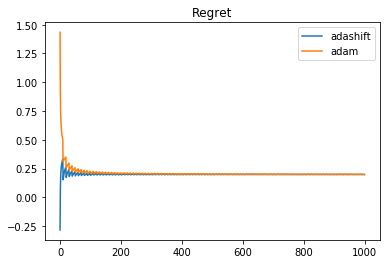

In [65]:
plt.title("Regret")
plt.plot(adashift_avg_regret_history, label='adashift')
plt.plot(avg_regret_history,label='adam')
plt.legend()
plt.show()

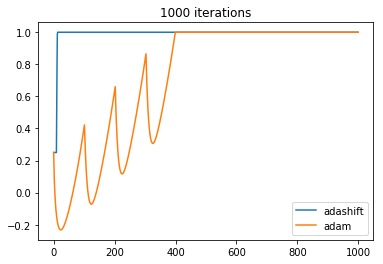

In [64]:
plt.title("1000 iterations")
plt.plot(adashift_x_history[:1000], label='adashift')
plt.plot(x_history[:1000],label='adam')
plt.legend()
plt.show()